## Plot climatological zonal-mean total column ozone

In this exercise you will read-in various total column ozone (TCO) datasets from a variety of sources:

1. Observations from Bodeker Scientific
2. Processed UKCA data submitted to phase 1 of the Chemistry-Climate Model Initative (CCMI1)
3. A ensemble of processed UKCA submitted to CCMI2022
4. UM-UKCA pp-file output run as part of the NERC ACSIS project

Some example plots will be given, along with suggested exercises for you to complete.

In [1]:
import iris
import iris.analysis
import iris.quickplot as qplt
import iris.coord_categorisation
import iris.analysis
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import cf_units
import matplotlib.cm as cm

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r?i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# read-in the UM-UKCA pp data, TCO is in STASH code s50i219
ukca=iris.load_cube(ukcadata,iris.AttributeConstraint(STASH='m01s50i219'))

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [4]:
# add the months to allow for aggregation
iris.coord_categorisation.add_month(ukca,'time')

# Only want 1995-2005 for a year-2000 climatology
# time constraints for extracting data
pdt1=iris.time.PartialDateTime(year=1995, month=1, day=1)
pdt2=iris.time.PartialDateTime(year=2006, month=1, day=1)
tconstr=iris.Constraint(time=lambda cell: pdt1 <= cell.point < pdt2)

# extract the data
ukca_2000=ukca.extract(tconstr)

# aggregate by month to produce a climatology
ukca_clim = ukca_2000.aggregated_by('month', iris.analysis.MEAN)

# zonally mean the data for plotting
ukca_zm=ukca_clim.collapsed('longitude',iris.analysis.MEAN)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [5]:
# levels for plotting
clevs=np.arange(150,420,30)

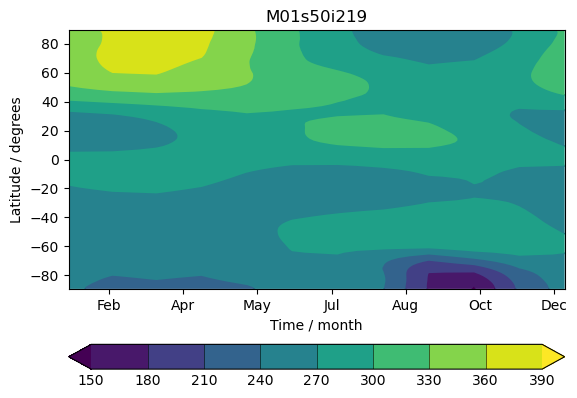

In [6]:
# plot the data
qplt.contourf(ukca_zm, clevs, extend='both')
# use month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Time / month')
plt.show()

In [7]:
# read observations
obs=iris.load_cube(obsdata,'equivalent_thickness_at_stp_of_atmosphere_ozone_content')

In [8]:
# add the months to allow for aggregation
iris.coord_categorisation.add_month(obs,'time')

# extract the data - same tconstr from before
obs_2000=obs.extract(tconstr)

# aggregate by month to produce a climatology
obs_clim = obs_2000.aggregated_by('month', iris.analysis.MEAN)

# zonally mean the data for plotting
obs_zm=obs_clim.collapsed('longitude',iris.analysis.MEAN)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


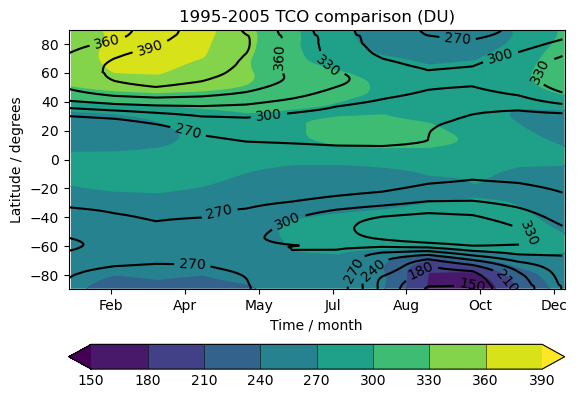

In [9]:
# plot the data
qplt.contourf(ukca_zm, clevs, extend='both')
CS=qplt.contour(obs_zm, clevs, colors='k')
# put labels on the contour lines
plt.gca().clabel(CS, CS.levels, inline=True, fontsize=10)
# use month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Time / month')
# give a plot title
plt.title('1995-2005 TCO comparison (DU)')
plt.show()

In [10]:
# now lets consider the CCMI1 data, and compare the 2000s with the 1960s
# 10-year files for CCMI1, need to remove differing attributes
inccmi=iris.load(ccmidata,'toz')
attrs=iris.util.equalise_attributes(inccmi)
# concatinate in time
ccmi=inccmi.concatenate_cube()

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_10384/614297019.py:3: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inccmi=iris.load(ccmidata,'toz')
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'toz'
  warnings.warn(
/tmp/ipykernel_10384/614297019.py:3: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  inccmi=iris.load(ccmidata,'toz')
/home/ubuntu/miniconda3/lib/pyth

In [11]:
# add the months to allow for aggregation
iris.coord_categorisation.add_month(ccmi,'time')

# Do 1960-1969 and 2000-2009
# time constraints for extracting data
# 1960s
pdt1a=iris.time.PartialDateTime(year=1960, month=1, day=1)
pdt2a=iris.time.PartialDateTime(year=1970, month=1, day=1)
tconstr_a=iris.Constraint(time=lambda cell: pdt1a <= cell.point < pdt2a)
# 2000s
pdt1b=iris.time.PartialDateTime(year=2000, month=1, day=1)
pdt2b=iris.time.PartialDateTime(year=2010, month=1, day=1)
tconstr_b=iris.Constraint(time=lambda cell: pdt1b <= cell.point < pdt2b)

# extract the data
ccmi_1960s=ccmi.extract(tconstr_a)
ccmi_2000s=ccmi.extract(tconstr_b)

# aggregate by month to produce a climatology
ccmi_1960s_clim = ccmi_1960s.aggregated_by('month', iris.analysis.MEAN)
ccmi_2000s_clim = ccmi_2000s.aggregated_by('month', iris.analysis.MEAN)

# produce a difference field
diff_abs=ccmi_2000s_clim.copy()
diff_abs.data=ccmi_2000s_clim.data - ccmi_1960s_clim.data
diff_pc=ccmi_2000s_clim.copy()
diff_pc.data=100.0*((ccmi_2000s_clim.data - ccmi_1960s_clim.data)/ccmi_1960s_clim.data)
# change the units
diff_pc.units='%'

# zonally mean
abs_zm=diff_abs.collapsed('longitude',iris.analysis.MEAN)
pc_zm=diff_pc.collapsed('longitude',iris.analysis.MEAN)

In [12]:
# need to fix the time points as aggregated by gets this wrong, so reset
# this is a 360-day calendar so middle of the month is the same each month
tpoints=np.arange(15,360,30)+((2000.0-1960.0)*360.0)
abs_zm.coord('time').points=tpoints
pc_zm.coord('time').points=tpoints

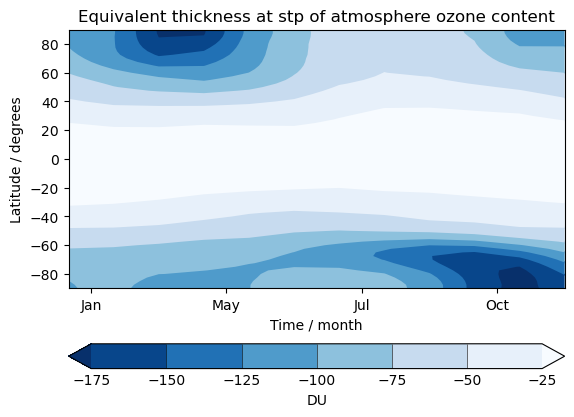

In [13]:
# plot the data
# change the colourmap, and reverse it
qplt.contourf(abs_zm, extend='both', cmap=cm.Blues_r)
# use month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Time / month')
plt.show()

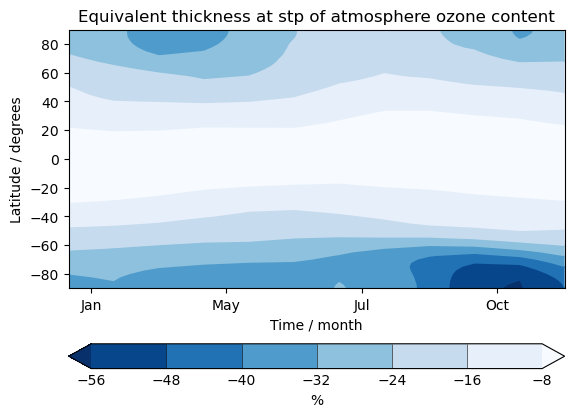

In [14]:
# plot the data
# change the colourmap, and reverse it
qplt.contourf(pc_zm, extend='both', cmap=cm.Blues_r)
# use month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Time / month')
plt.show()

### Further exercises to try:

1. Try comparing the CCMI2022 ensemble members against the ensemble mean.
2. Try comparing the nudged UM-UKCA ACSIS data against the CCMI2022 ensemble mean. Here the principal difference between the simulations is the use of nudging to constrain the winds and temperatures.